In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_cluster = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Cluster.csv")
df_micro = pd.read_csv("../../../data/EEG/RestingEEG_Microstates.csv")
df_spectro = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Cluster.csv")
df_beha = pd.read_csv('../../../data/Behavioral/AllData.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (66,68,80,81,82,83,84,95,96,97,98,99,110,111,112,113,114,125,126,127,128,129,140,141,142,144,155,156,157,159,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103

In [109]:
df_beha_healthy = df_beha[df_beha["DX_01_Cat"].str.contains("No Diagnosis Given") == True]
#df_beha["DX_01_Cat"].str.contains("No Diagnosis Given")

In [110]:
df_beha_healthy

,Anonymized.ID,Subject.Type,Visit,Days.since.enrollment,EID,START_DATE,Patient_ID,Enrollment.Year,Enrollment.Season,Sex,...,YSR_TP,YSR_TP_T,YSR_Ext,YSR_Ext_T,YSR_Int,YSR_Int_T,YSR_OP,YSR_C,YSR_Total,YSR_Total_T
9,A00078873,UNKNOWN,V1,0,NDARCF462HNM,1901-01-01T07:00:00Z,NDARCF462HNM,2015,Spring,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,A00078875,UNKNOWN,V1,0,NDARFC233RND,1901-01-01T07:00:00Z,NDARFC233RND,2015,Spring,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,A00078886,UNKNOWN,V1,0,NDARDT800YVF,1901-01-01T07:00:00Z,NDARDT800YVF,2015,Summer,0,...,1.0,50.0,3.0,40.0,5.0,46.0,5.0,12.0,20.0,42.0
25,A00078889,UNKNOWN,V1,0,NDARZT011LBZ,1901-01-01T07:00:00Z,NDARZT011LBZ,2015,Summer,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,A00078890,UNKNOWN,V1,0,NDARKV482FU9,1901-01-01T07:00:00Z,NDARKV482FU9,2015,Summer,0,...,1.0,50.0,9.0,51.0,1.0,35.0,2.0,7.0,17.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,A00093554,UNKNOWN,V1,0,NDARAV069HGT,1901-01-01T07:00:00Z,NDARAV069HGT,2018,Summer,1,...,8.0,63.0,10.0,52.0,28.0,67.0,8.0,40.0,78.0,66.0
2089,A00093555,UNKNOWN,V1,0,NDARZC497BFU,1901-01-01T07:00:00Z,NDARZC497BFU,2018,Summer,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2090,A00093556,UNKNOWN,V1,0,NDARDZ737LG9,1901-01-01T07:00:00Z,NDARDZ737LG9,2018,Summer,0,...,4.0,55.0,11.0,53.0,12.0,58.0,5.0,24.0,47.0,58.0
2094,A00093560,UNKNOWN,V1,0,NDARRT283RHB,1901-01-01T07:00:00Z,NDARRT283RHB,2018,Fall,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
renamed_beha  = df_beha.rename(columns = {'Patient_ID' : 'True_ID'}, inplace=False)
renamed_beha_healthy  = df_beha_healthy.rename(columns = {'Patient_ID' : 'True_ID'}, inplace=False)
renamed_cluster = df_cluster.rename(columns = {'id' : 'True_ID'} , inplace = False)
renamed_micro = df_micro.rename(columns = {'id' : 'True_ID'} , inplace = False)
renamed_spectro = df_spectro.rename(columns = {'id' : 'True_ID'} , inplace = False)

In [166]:
df = pd.merge(renamed_beha_healthy[['Age' , 'True_ID']], renamed_cluster, on='True_ID')
df = pd.merge(df, renamed_micro, on='True_ID')
df = pd.merge(df, renamed_spectro, on='True_ID')
labels = [0,1,2,3]
#df['age_cat'] = pd.cut(df['Age'] , [0.0 , 5.0, 10.0 , 15.0 , 25.0], labels = labels)

In [150]:
pd.isna(df).any(axis=1).sum()
#df[1]

371

In [164]:
df = df.drop(['True_ID'] , axis=1)
df = df.dropna(axis=0)

In [167]:
df

,Age,True_ID,eyesclosed_psd_01dot00hz_lfront,eyesclosed_psd_01dot00hz_mfront,eyesclosed_psd_01dot00hz_rfront,eyesclosed_psd_01dot00hz_lpari,eyesclosed_psd_01dot00hz_mpari,eyesclosed_psd_01dot00hz_rpari,eyesclosed_psd_01dot50hz_lfront,eyesclosed_psd_01dot50hz_mfront,...,eyesopen_fooof_peak_freq_rfront,eyesopen_fooof_peak_freq_lpari,eyesopen_fooof_peak_freq_mpari,eyesopen_fooof_peak_freq_rpari,eyesopen_fooof_peak_amplitude_lfront,eyesopen_fooof_peak_amplitude_mfront,eyesopen_fooof_peak_amplitude_rfront,eyesopen_fooof_peak_amplitude_lpari,eyesopen_fooof_peak_amplitude_mpari,eyesopen_fooof_peak_amplitude_rpari
0,10.758156,NDARYP516VUU,8.029552,13.149798,6.666945,7.786644,12.514439,10.988590,7.158870,11.647792,...,10.750797,10.401234,10.783732,11.046665,0.821805,0.784304,0.770845,0.914380,0.671399,1.004923
1,7.489961,NDARUG507AZX,8.643436,13.920226,9.507311,13.757712,12.823414,12.975981,8.126452,12.608441,...,NaN,8.053424,8.141264,8.571672,0.328292,0.307018,NaN,0.324379,0.298727,0.363965
2,20.425507,NDARMY301WFK,4.588229,6.053230,2.934095,3.404855,6.849163,5.392496,3.879431,5.046293,...,6.736889,16.940778,11.988363,12.070862,0.319242,0.195822,0.090549,0.379610,0.159600,0.260264
3,9.375998,NDARTU768MY1,2.818223,5.137840,4.185083,6.242574,6.575930,4.953940,2.413240,4.540075,...,8.455434,8.630086,7.852231,9.723609,0.236156,0.122416,0.088771,0.067187,0.091045,0.147412
4,6.533652,NDARUA421HT8,9.248910,12.655864,9.398000,15.470128,20.408125,9.436614,8.910081,12.286778,...,8.647622,8.592183,8.466888,8.355260,0.757584,0.818975,0.748706,0.833276,0.897094,0.849516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,5.832762,NDAREG590BNY,9.221194,11.640470,7.587241,6.563253,14.333292,10.642056,7.691062,10.806447,...,6.691546,5.680824,7.186319,7.392278,0.261295,0.308329,0.444629,0.313839,0.294175,0.276237
124,8.751996,NDARLY114PDC,4.591457,9.012714,9.575227,11.602596,12.398226,6.672156,3.795061,7.696279,...,7.353161,7.882419,7.324259,7.403645,0.253455,0.241029,0.289795,0.253593,0.255053,0.237755
125,16.951631,NDARVC195NLH,2.889551,3.719512,4.820008,2.577182,3.443281,2.160527,2.294605,3.153545,...,3.000000,10.225678,10.017683,10.266229,0.358173,0.105748,0.288578,0.232076,0.335827,0.589192
126,7.694501,NDARPL596YTD,8.978947,12.059522,11.079629,9.276706,12.921198,8.542723,8.587342,11.516229,...,6.722080,9.676071,7.206081,10.002832,0.597073,0.602230,0.081976,0.495620,0.159390,0.571627


In [153]:
Y = df['Age'].to_numpy()
X = df.loc[:,df.columns!='Age'].to_numpy()

In [154]:
Y = Y / Y.max()

In [155]:
Y

array([0.34942273, 0.37113321, 0.49311874, 0.566423  , 0.38306038,
       0.33087572, 0.82294347, 0.42409696, 0.32144798, 0.6998442 ,
       0.44659179, 0.5221079 , 0.45171089, 0.67797159, 0.48508713,
       0.48385307, 0.63405391, 0.58058815, 0.72932487, 0.50468513,
       0.69544667, 0.58513209, 0.36574217, 0.55866852, 0.35683733,
       0.3606283 , 0.86696053, 0.34252054, 0.34252054, 0.41721572,
       0.40251198, 0.45888498, 0.74849929, 0.50080524, 0.80986593,
       0.39526469, 0.3314875 , 0.95433584, 0.3957353 , 0.5842275 ,
       0.97125143, 0.61083746, 0.58924726, 0.50516619, 0.45672542,
       0.47241745, 0.60947795, 0.54432034, 0.65641274, 0.40063478,
       0.4139581 , 0.79307588, 0.46240405, 0.29210325, 0.36740498,
       0.56128818, 0.30035973, 0.5606346 , 0.70219195, 0.45270962,
       0.33000248, 0.69579177, 0.6004476 , 0.74814896, 0.24740121,
       0.49650708, 0.43940725, 0.61410031, 0.73221121, 0.57870573,
       0.30839138, 0.68716406, 0.40062956, 0.57331473, 0.51498

In [156]:
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding
import umap
import phate
import seaborn as sns

Calculating PHATE...
  Running PHATE on 603 observations and 2365 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.15 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.05 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.22 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 0.09 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.04 seconds.
  Calculating metric MDS...


/Users/mathieuchevalley/Library/Python/3.7/lib/python/site-packages/graphtools/graphs.py:284: RuntimeWarning: Detected zero distance between samples 27 and 28. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


  Calculated metric MDS in 0.34 seconds.
Calculated PHATE in 0.70 seconds.


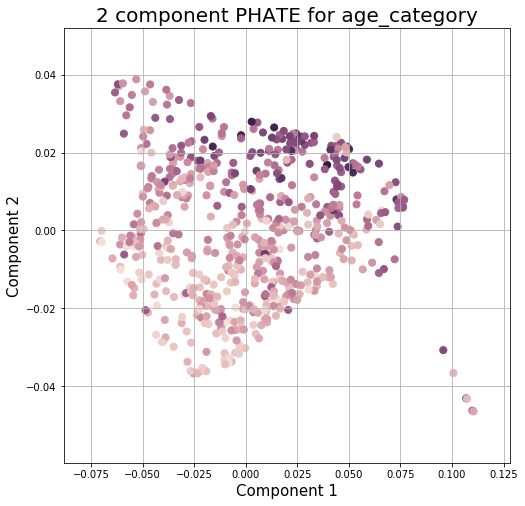

In [160]:
n = X.shape[0]
target_dict = {0:'[0,5]' , 1:'[5,10]' , 2:'[10,15]', 3:'[15,20]' , 4:'[20,25]'}
target_ind = target_dict.keys()
target_val = target_dict.values()
index_tot = np.array([])

#reducer = umap.UMAP()
#data = reducer.fit_transform(X)
phate_op = phate.PHATE()
data = phate_op.fit_transform(X)
#tsne = SpectralEmbedding(n_components=2)
#data = tsne.fit_transform(X , Y)

df = pd.DataFrame(data = data,
                          columns = ['component 1' ,
                                    'component 2'])

labels = pd.DataFrame(Y)

finalDf = pd.concat([df, labels] , axis=1)

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component PHATE for age_category', fontsize = 20)
#targets = ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
#targets = target_ind #range(4)

#colors = ['r', 'g', 'b' , 'y' , 'm'] #k = black #m = magenta
#for target, color in zip(target_ind , colors):
#    indicesToKeep = labels == target
#    indicesToKeep = indicesToKeep.values[:,0]
#    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
#               , finalDf.loc[indicesToKeep, 'component 2']
#               , c = color
#               , s = 50)
cmap = sns.cubehelix_palette(light=.9, as_cmap=True)
ax.scatter(df['component 1'], df['component 2'], c=Y, s=50, cmap=cmap)
#ax.legend(target_val)
ax.grid()

plt.savefig('plot_tnse_mit.png')
plt.show()

In [136]:
Y.size

174